In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    file_id = "1HZY6oVK8lm-5-2XPip2TCCY-beOxW_he"
    url = f"https://drive.google.com/uc?id={file_id}"
    df = pd.read_csv(url)
    df["median_house_value"] /= 1000.0  # Convert to thousands
    
    print("First 5 rows of data:")
    print(df.head())
    return df

# Run this
df = load_data()

First 5 rows of data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936                66.9  
1      1129.0       463.0         1.8200                80.1  
2       333.0       117.0         1.6509                85.7  
3       515.0       226.0         3.1917                73.4  
4       624.0       262.0         1.9250                65.5  


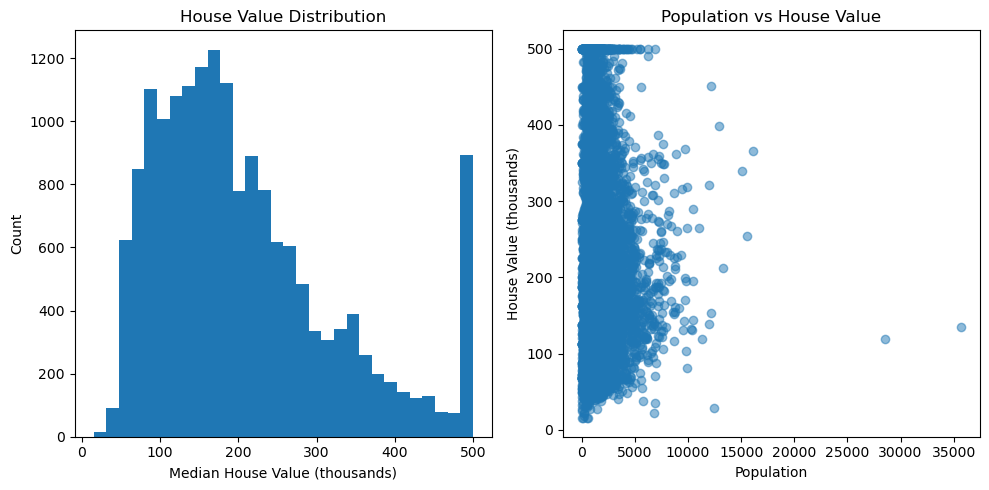

In [8]:
def plot_data(df):
    plt.figure(figsize=(10, 5))
    
    # House value distribution
    plt.subplot(1, 2, 1)
    plt.hist(df['median_house_value'], bins=30)
    plt.title('House Value Distribution')
    plt.xlabel('Median House Value (thousands)')
    plt.ylabel('Count')
    
    # Population vs house value
    plt.subplot(1, 2, 2)
    plt.scatter(df['population'], df['median_house_value'], alpha=0.5)
    plt.title('Population vs House Value')
    plt.xlabel('Population')
    plt.ylabel('House Value (thousands)')
    
    plt.tight_layout()
    plt.show()

# Run this
plot_data(df)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(df):
    # Separate features and target
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("Training set shape:", X_train_scaled.shape)
    print("Testing set shape:", X_test_scaled.shape)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Run this
X_train, X_test, y_train, y_test = prepare_data(df)

Training set shape: (13600, 8)
Testing set shape: (3400, 8)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(df):
    # Separate features and target
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("Training set shape:", X_train_scaled.shape)
    print("Testing set shape:", X_test_scaled.shape)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Run this
X_train, X_test, y_train, y_test = prepare_data(df)

Training set shape: (13600, 8)
Testing set shape: (3400, 8)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_model(X_train, X_test, y_train, y_test):
    # Create and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Performance:")
    print(f"RMSE: ${rmse:,.2f}k")
    print(f"R² Score: {r2:.4f}")
    
    return model, y_pred

# Run this
model, y_pred = train_model(X_train, X_test, y_train, y_test)

Model Performance:
RMSE: $68.08k
R² Score: 0.6636


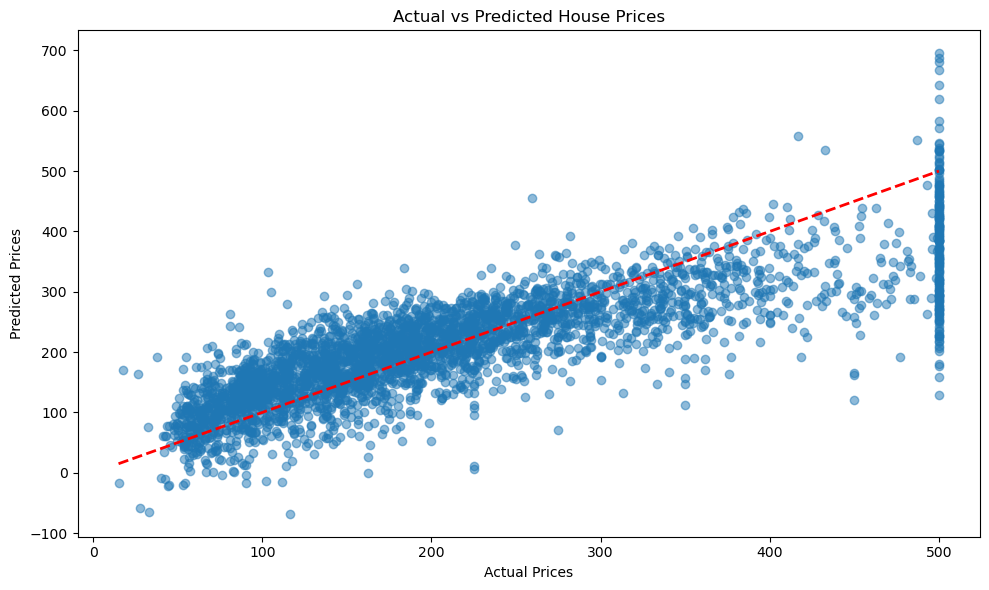

In [12]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted House Prices')
    plt.tight_layout()
    plt.show()

# Run this
plot_predictions(y_test, y_pred)

Step 1: Loading data...
First 5 rows of data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936                66.9  
1      1129.0       463.0         1.8200                80.1  
2       333.0       117.0         1.6509                85.7  
3       515.0       226.0         3.1917                73.4  
4       624.0       262.0         1.9250                65.5  

Step 2: Plotting data...


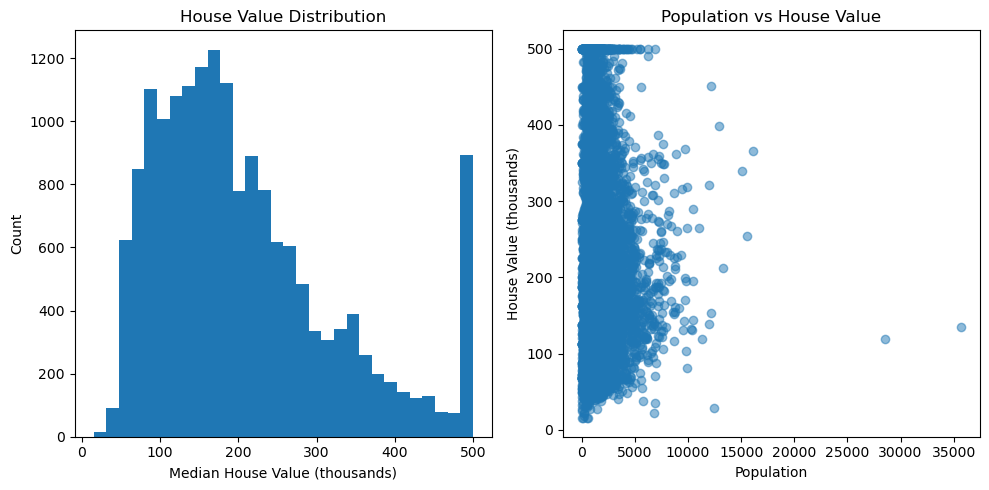


Step 3: Preparing data...
Training set shape: (13600, 8)
Testing set shape: (3400, 8)

Step 4: Training model...
Model Performance:
RMSE: $68.08k
R² Score: 0.6636

Step 5: Visualizing predictions...


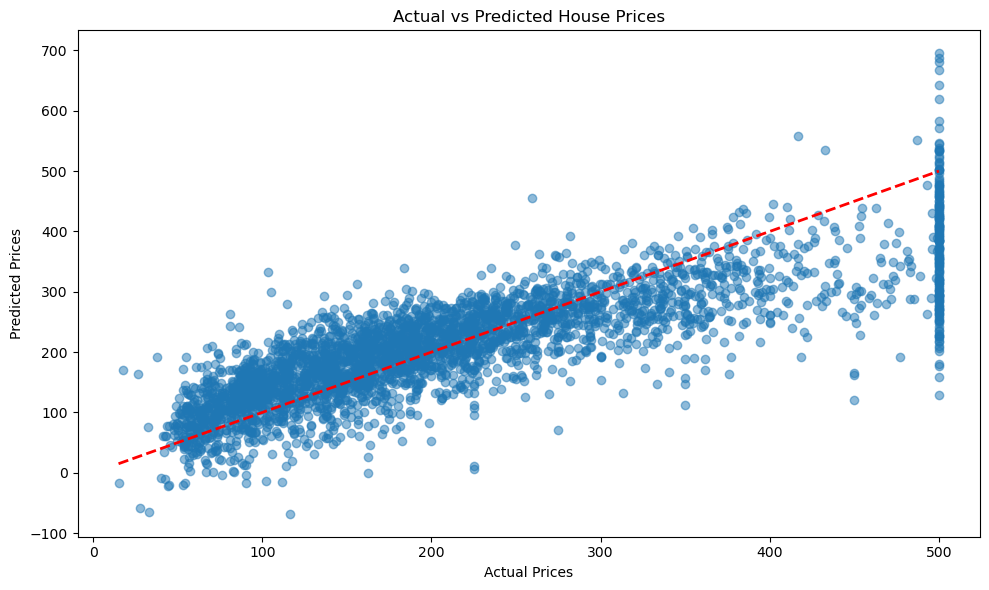


Sample predictions:
Actual: $142.70k, Predicted: $143.77k
Actual: $500.00k, Predicted: $398.62k
Actual: $61.80k, Predicted: $86.34k
Actual: $162.80k, Predicted: $148.53k
Actual: $90.60k, Predicted: $147.20k


In [13]:
def main():
    print("Step 1: Loading data...")
    df = load_data()
    
    print("\nStep 2: Plotting data...")
    plot_data(df)
    
    print("\nStep 3: Preparing data...")
    X_train, X_test, y_train, y_test = prepare_data(df)
    
    print("\nStep 4: Training model...")
    model, y_pred = train_model(X_train, X_test, y_train, y_test)
    
    print("\nStep 5: Visualizing predictions...")
    plot_predictions(y_test, y_pred)
    
    # Make some sample predictions
    print("\nSample predictions:")
    for actual, pred in zip(y_test[:5], y_pred[:5]):
        print(f"Actual: ${actual:,.2f}k, Predicted: ${pred:,.2f}k")

# Run everything
if __name__ == "__main__":
    main()